# Modelo ML

In [13]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

### Importo  todos mis datasets

In [14]:
# Path donde se encuentran mis archivos train
BASE_PATH = "../data/processed"
TRAIN_PATHS = [
    "X_train_con_outliers_raw.xlsx",
    "X_train_sin_outliers_raw.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]

# Guardo cada uno de estos archivos dentro de una lista
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}")
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

# Path donde se encuentran mis archivos test
TEST_PATHS = [
    "X_test_con_outliers_raw.xlsx",
    "X_test_sin_outliers_raw.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]

# Guardo cada uno de estos archivos dentro de una lista
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

## Entreno un modelo por cada uno de mis datasets

In [15]:
results = []
for index, dataset in enumerate(TRAIN_DATASETS):
    model = LinearRegression(n_jobs = 14)
    model.fit(dataset, y_train)
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    results.append({
        "train_r2": r2_score(y_train, y_pred_train),
        "train_mse": mean_squared_error(y_train, y_pred_train),
        "test_r2": r2_score(y_test, y_pred_test),
        "test_mse": mean_squared_error(y_test, y_pred_test),
    })

df_results = pd.DataFrame(results)
# Calcular RMSE
df_results["train_rmse"] = np.sqrt(df_results["train_mse"])
df_results["test_rmse"] = np.sqrt(df_results["test_mse"])
# Seleccionar columnas relevantes para mostrar en tabla
df_results = df_results[["train_rmse", "test_rmse", "train_r2", "test_r2"]]
# Mostrar tabla
print(df_results)

   train_rmse  test_rmse  train_r2   test_r2
0    1.492746   1.582346  0.945233  0.938412
1    1.519230   1.598188  0.943273  0.937173
2    1.492443   1.582023  0.945256  0.938437
3    1.519230   1.598188  0.943273  0.937173
4    1.492443   1.582023  0.945256  0.938437
5    1.519230   1.598188  0.943273  0.937173


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": np.linspace(0.0001, 1000, 30),
    "max_iter": [100, 300, 600, 1000, 2000, 4000, 8000, 12000],
    "tol": np.linspace(0.0001, 0.01, 30),
}


param_grid_elastic = {
    "alpha": np.linspace(0.0001, 1000, 30),
    "l1_ratio": [0.1, 0.5, 0.9],
    "max_iter": [100, 300, 1000, 2000, 4000, 8000, 12000],
    "tol": np.linspace(0.0001, 0.01, 30),
}

### Aplico optimizacion RIDGE sobre mi mejor dataset

In [17]:
from sklearn.linear_model import Ridge

# Indice de mi mejor dataset
best_dataset = 4

ridge_model = Ridge(random_state= 42)

grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'r2', cv = 5, n_jobs = 14)

grid_ridge.fit(TRAIN_DATASETS[best_dataset], y_train)

y_pred_train = grid_ridge.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = grid_ridge.predict(TEST_DATASETS[best_dataset])


results_ridge = []

results_ridge.append({
        "train_r2": r2_score(y_train, y_pred_train),
        "train_mse": mean_squared_error(y_train, y_pred_train),
        "test_r2": r2_score(y_test, y_pred_test),
        "test_mse": mean_squared_error(y_test, y_pred_test),
    })

df_ridge = pd.DataFrame(results_ridge)

print(df_ridge)

   train_r2  train_mse   test_r2  test_mse
0  0.945232   2.228356  0.938413   2.50378


### Aplico optimizacion LASSO sobre mi mejor dataset

In [18]:
from sklearn.linear_model import Lasso

# Carga de los datos de train y test
# Estos datos deben haber sido normalizados y correctamente tratados en un EDA completo

lasso_model = Lasso(random_state=42)

grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'r2', cv = 5, n_jobs = 14)


grid_lasso.fit(TRAIN_DATASETS[best_dataset], y_train)

y_pred_train = grid_lasso.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = grid_lasso.predict(TEST_DATASETS[best_dataset])


results_lasso = []

results_lasso.append({
        "train_r2": r2_score(y_train, y_pred_train),
        "train_mse": mean_squared_error(y_train, y_pred_train),
        "test_r2": r2_score(y_test, y_pred_test),
        "test_mse": mean_squared_error(y_test, y_pred_test),
    })

df_lasso = pd.DataFrame(results_lasso)

print(df_lasso)

   train_r2  train_mse  test_r2  test_mse
0    0.9452   2.229655  0.93854  2.498639


### Aplico optimizacion Elastic Net sobre mi mejor dataset

In [19]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(random_state=42)

grid_elastic = GridSearchCV(estimator = elastic_net_model, param_grid = param_grid_elastic, scoring = 'r2', cv = 5, n_jobs = 14)

grid_elastic.fit(TRAIN_DATASETS[best_dataset], y_train)

y_pred_train = grid_elastic.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = grid_elastic.predict(TEST_DATASETS[best_dataset])




results_elastic = []

results_elastic.append({
        "train_r2": r2_score(y_train, y_pred_train),
        "train_mse": mean_squared_error(y_train, y_pred_train),
        "test_r2": r2_score(y_test, y_pred_test),
        "test_mse": mean_squared_error(y_test, y_pred_test),
    })

df_elastic = pd.DataFrame(results_elastic)

print(df_elastic)

   train_r2  train_mse   test_r2  test_mse
0  0.945153   2.231577  0.938752  2.490002


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+01, tolerance: 1.022e+01
  model = cd_fast.enet_coordinate_descent(


k = 6: R2_Score = 0.9344
k = 7: R2_Score = 0.9344
k = 8: R2_Score = 0.9346
k = 9: R2_Score = 0.9345
k = 10: R2_Score = 0.9343
k = 11: R2_Score = 0.9343
k = 12: R2_Score = 0.9355
k = 13: R2_Score = 0.9355
k = 14: R2_Score = 0.9366
k = 15: R2_Score = 0.9366
k = 16: R2_Score = 0.9366
k = 17: R2_Score = 0.9367
k = 18: R2_Score = 0.9367
k = 19: R2_Score = 0.9367


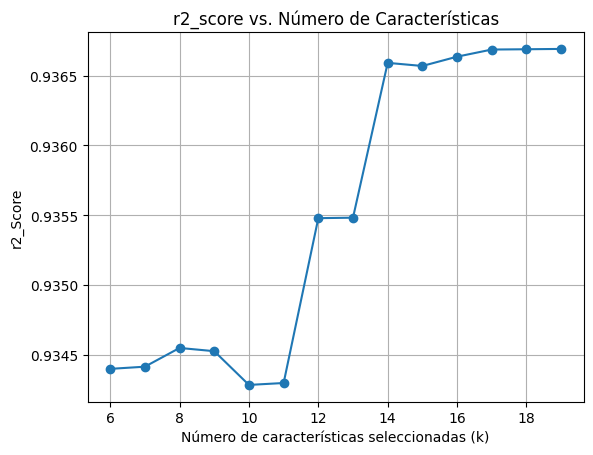

Características seleccionadas: ['TOT_POP', 'White-alone pop', '% Black-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', 'R_death_2018', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'MEDHHINC_2018', 'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Population Aged 60+', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence']


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

X_train_best = TRAIN_DATASETS[best_dataset]
X_test_best = TEST_DATASETS[best_dataset]

# Rango de k a evaluar; puedes ajustar estos valores según tu conveniencia
k_values = range(6, 20)  
r2_scores = []

for k in k_values:
    # Selección de características con k
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_k = selector.fit_transform(X_train_best, y_train.values.ravel())
    X_test_k = selector.transform(X_test_best)
    
    # Entrenamiento del modelo de regresión logística
    grid_elastic.fit(X_train_k, y_train.values.ravel())
    y_pred_k = grid_elastic.predict(X_test_k)
    
    # Calculamos el accuracy para este k
    score = r2_score(y_test, y_pred_k)
    r2_scores.append(score)
    print(f"k = {k}: R2_Score = {score:.4f}")

# Graficamos r2 Score vs. Número de Características (k)
plt.figure()
plt.plot(list(k_values), r2_scores, marker='o')
plt.xlabel("Número de características seleccionadas (k)")
plt.ylabel("r2_Score")
plt.title("r2_score vs. Número de Características")
plt.grid(True)
plt.show()


# Mostramos cuáles características han sido seleccionadas
mask = selector.get_support()
selected_features = X_train_best.columns[mask]
print("Características seleccionadas:", selected_features.tolist())